<a href="https://colab.research.google.com/github/rcxx06/Colabs/blob/main/MSFTAnalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [ ]:
data = yf.download('MSFT', start="2020-01-01", end="2025-08-21")
data.head()

/tmp/ipython-input-3466418901.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('MSFT', start="2020-01-01", end="2025-08-21")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,152.791153,152.895792,150.612777,151.040841,22622100
2020-01-03,150.888596,152.153771,150.355893,150.603230,21116200
2020-01-06,151.278610,151.345205,148.881435,149.423659,20813700
2020-01-07,149.899323,151.887449,149.652001,151.554518,21634100
2020-01-08,152.286987,152.962387,150.251294,151.183524,27746500


In [ ]:
data.columb = ['Close','High','Low', 'Open', 'Volumen']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1416 entries, 2020-01-02 to 2025-08-20
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   1416 non-null   float64
 1   (High, MSFT)    1416 non-null   float64
 2   (Low, MSFT)     1416 non-null   float64
 3   (Open, MSFT)    1416 non-null   float64
 4   (Volume, MSFT)  1416 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 66.4 KB


/tmp/ipython-input-3863283598.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.columb = ['Close','High','Low', 'Open', 'Volumen']


In [ ]:
data['Retornos'] = np.log(data['Close']/data['Close'].shift(1))
retornos = data['Retornos'].dropna()
retornos.head()

,Retornos
Date,
2020-01-03,-0.012530
2020-01-06,0.002581
2020-01-07,-0.009159
2020-01-08,0.015803
2020-01-09,0.012415


In [ ]:
retornos= pd.DataFrame(retornos)
retornos.index = pd.to_datetime(retornos.index)
retornos['year']=retornos.index.year
retornos['year']=retornos['year'].astype('category')
retornos.head()

,Retornos,year
Date,,
2020-01-03,-0.012530,2020
2020-01-06,0.002581,2020
2020-01-07,-0.009159,2020
2020-01-08,0.015803,2020
2020-01-09,0.012415,2020


In [ ]:
retornos['Retornos'].describe()

,Retornos
count,1415.000000
mean,0.000845
std,0.018993
min,-0.159453
25%,-0.008060
50%,0.001109
75%,0.010643
max,0.132929


/tmp/ipython-input-3377658657.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retornos.groupby('year')['Retornos'].agg('median').plot()


<Axes: xlabel='year'>

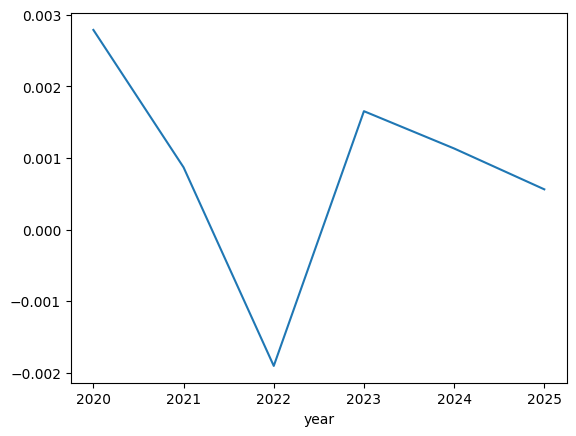

In [ ]:
retornos.groupby('year')['Retornos'].agg('median').plot()

/tmp/ipython-input-1291692833.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retornos.groupby('year')['Retornos'].agg('std').plot()


<Axes: xlabel='year'>

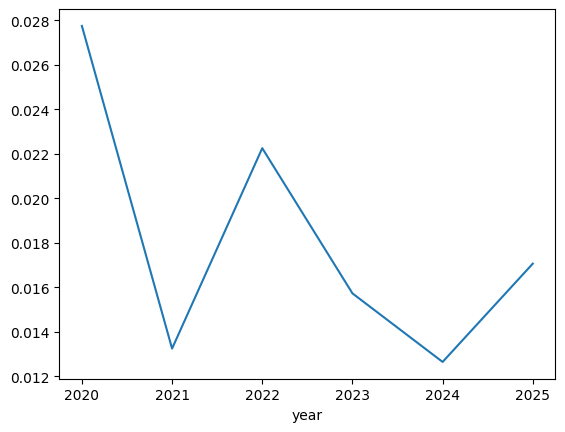

In [ ]:
retornos.groupby('year')['Retornos'].agg('std').plot()

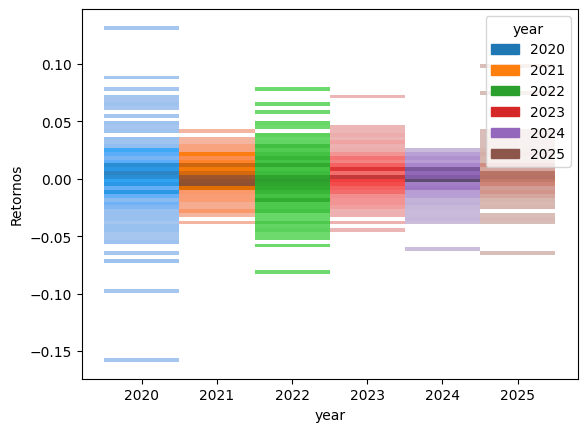

In [ ]:
sns.histplot(x='year', y='Retornos',hue='year', data=retornos)
plt.show()